### Student Code: VP50009RP

## Title: Unsupervised Classification

In this project, we carry out an unsupervised learning to ascertain the number of classses in the datasets provided.

We implement KMeans clustering, Agglomerative clustering and Hierarchical clustering and compare the results.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

<h3>Pixels Data</h3>

In [33]:
data_pix = pd.read_csv('mfeat-pix', sep="\s+", header=None)
data_pix.columns= ["pix_"+str(i) for i in range(data_pix.shape[1])]
data_pix.head()

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,...,pix_230,pix_231,pix_232,pix_233,pix_234,pix_235,pix_236,pix_237,pix_238,pix_239
0,0,3,4,4,6,6,6,6,6,5,...,4,4,4,4,4,3,0,0,0,0
1,0,0,0,0,0,0,1,3,4,4,...,2,4,4,4,4,2,0,0,0,0
2,0,0,1,4,4,4,4,4,4,3,...,1,3,4,4,4,4,4,2,1,0
3,0,0,3,3,2,2,4,5,6,6,...,4,4,4,4,2,0,0,0,0,0
4,0,0,0,0,0,0,3,4,6,6,...,4,4,4,4,3,1,0,0,0,0


In [34]:
data_pix.shape

(2000, 240)

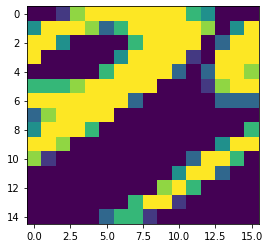

In [36]:
#We print an image
pix = data_pix.values.reshape(2000,15,16)
plt.imshow(pix[1999])

In [37]:
data_pix.describe().T

,count,mean,std,min,25%,50%,75%,max
pix_0,2000.0,0.5470,1.368111,0.0,0.0,0.0,0.0,6.0
pix_1,2000.0,1.3355,2.128898,0.0,0.0,0.0,3.0,6.0
pix_2,2000.0,2.0895,2.407777,0.0,0.0,1.0,4.0,6.0
pix_3,2000.0,2.7710,2.437115,0.0,0.0,3.0,5.0,6.0
pix_4,2000.0,3.3965,2.386029,0.0,0.0,4.0,6.0,6.0
...,...,...,...,...,...,...,...,...
pix_235,2000.0,2.5130,1.764479,0.0,0.0,4.0,4.0,4.0
pix_236,2000.0,2.0855,1.825611,0.0,0.0,2.0,4.0,4.0
pix_237,2000.0,1.5115,1.792896,0.0,0.0,0.0,4.0,4.0
pix_238,2000.0,0.9180,1.547732,0.0,0.0,0.0,1.0,4.0


In [38]:
# Normalize the features so they're on the same scale
pix_scaled = MinMaxScaler().fit_transform(data_pix)

#And perform PCA on the data
pca = PCA().fit(pix_scaled)


In [39]:
#We calculate the variance explained by the components.
variance=pca.explained_variance_ratio_*100
cumulative_sum=variance.cumsum()


In [40]:
cum_table=pd.DataFrame({'variance(%)': variance,'cumulative_sum':cumulative_sum})
cum_table.loc[:22]

,variance(%),cumulative_sum
0,17.014642,17.014642
1,10.431059,27.445701
2,9.419129,36.864830
3,6.552816,43.417646
4,5.599905,49.017551
5,4.525732,53.543283
6,3.786881,57.330164
7,3.135316,60.465481
8,2.843775,63.309256
9,2.502350,65.811606


Only about the first 22 principal components have up to 80% variance. So we plot the cumulative variance explained by the number of components to also visualize this result.

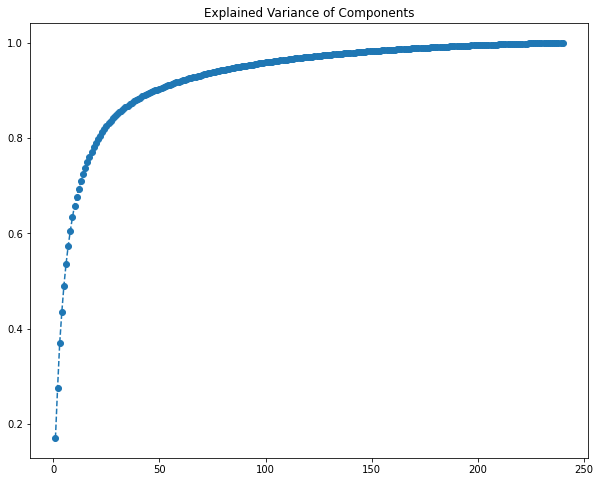

In [42]:
plt.figure(figsize=(10,8))
plt.plot(range(1,241),pca.explained_variance_ratio_.cumsum(), 
         marker='o', linestyle='--')
plt.title("Explained Variance of Components")
plt.show()

We see that 80%, it also shows that we should use about 22 components.

In [43]:
#We then take the first 22 components as our new pixel dataset
pca = PCA(n_components=22).fit(pix_scaled)
column=['PF'+str(i) for i in range(pca.n_components)]
pix_new= pd.DataFrame(pca.transform(pix_scaled),columns=column)
pix_new

,PF0,PF1,PF2,PF3,PF4,PF5,PF6,PF7,PF8,PF9,...,PF12,PF13,PF14,PF15,PF16,PF17,PF18,PF19,PF20,PF21
0,-1.330761,-4.420764,-0.041487,-1.221340,0.413767,-0.753531,1.983621,0.427663,-1.792405,0.115316,...,0.634355,0.761215,0.460109,0.412483,-0.138429,1.382730,-0.729101,-0.001332,-0.045024,0.189576
1,-0.539438,-2.903068,-1.354833,-0.823216,2.960383,0.019779,0.926301,0.482124,-1.139131,-1.229420,...,0.829097,0.262636,-0.476637,-0.709488,0.601872,0.235249,0.114115,0.440654,0.024156,-0.254449
2,-2.130475,-2.728522,-0.357321,0.449963,0.408553,-1.812645,1.107649,2.583598,-0.522121,-0.496106,...,0.104614,0.373711,0.061525,-0.410087,0.082360,-0.638000,0.417251,0.322236,-0.390926,0.286208
3,-0.655534,-3.372838,-0.168209,-0.795405,0.875015,-0.308319,0.649188,2.283097,-1.538732,0.555119,...,-0.094444,-0.165365,0.966977,-0.126371,0.239653,-0.701433,0.521158,0.205995,-0.038035,-0.736197
4,-2.361162,-2.646377,-0.662862,-1.853961,2.545806,0.021505,1.147317,0.344981,0.363869,-1.042285,...,0.445140,1.122558,0.447435,-0.986945,-0.182847,0.086780,0.269582,0.595345,0.608900,0.090668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.478598,-2.178905,-2.287466,0.139168,-1.165707,-2.294721,-0.848071,-0.927374,1.317573,1.335740,...,0.535559,1.917337,-0.230514,-0.370226,-0.075186,0.294291,-0.031045,0.821258,0.483920,0.394938
1996,2.820336,-1.640937,-2.402354,-0.458537,0.694031,0.994304,0.781416,0.659157,0.380509,-0.683792,...,1.091634,0.393977,0.523043,0.451615,-0.122587,0.626825,-0.046134,0.634849,1.040755,-1.601395
1997,1.471122,-2.406925,-1.717888,1.783513,0.804870,-0.742952,-0.084728,-1.311320,-1.090249,0.537873,...,0.465456,2.016519,0.453611,0.348991,0.760928,-0.634498,0.948097,0.086336,-0.951406,0.224862
1998,0.382326,-2.103290,-2.869265,0.481295,0.823655,-1.442792,-1.938549,-0.729881,-0.321341,0.199426,...,0.178647,0.974741,-0.440624,-0.793103,1.015157,-0.451820,0.123161,0.359003,0.333327,0.512571


We then use the results from the PCA as our new dataset and perform clustering with it.

We do not know the number of clusters to use. So we use the K-Means algorithm to find the optimal number of clusters.

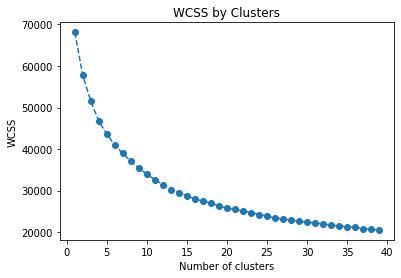

In [44]:
wcss = []
for i in range(1, 40):
    kmeans_pix = KMeans(n_clusters = i, init='k-means++',random_state=1)
    # Fit the data points
    kmeans_pix.fit(pix_new.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans_pix.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 40), wcss,marker='o',linestyle='--')
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the graph, inertia reduces after 5 clusters. Hence, we choose 5 clusters and find the classes in the dataset.

In [45]:
# Create a model based on 5 centroids
model = KMeans(n_clusters=5, init='k-means++', n_init=100, max_iter=1000,random_state=1)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(pix_new.values)
# View the cluster assignments
pix_new['Class']=km_clusters
pix_new

,PF0,PF1,PF2,PF3,PF4,PF5,PF6,PF7,PF8,PF9,...,PF13,PF14,PF15,PF16,PF17,PF18,PF19,PF20,PF21,Class
0,-1.330761,-4.420764,-0.041487,-1.221340,0.413767,-0.753531,1.983621,0.427663,-1.792405,0.115316,...,0.761215,0.460109,0.412483,-0.138429,1.382730,-0.729101,-0.001332,-0.045024,0.189576,2
1,-0.539438,-2.903068,-1.354833,-0.823216,2.960383,0.019779,0.926301,0.482124,-1.139131,-1.229420,...,0.262636,-0.476637,-0.709488,0.601872,0.235249,0.114115,0.440654,0.024156,-0.254449,2
2,-2.130475,-2.728522,-0.357321,0.449963,0.408553,-1.812645,1.107649,2.583598,-0.522121,-0.496106,...,0.373711,0.061525,-0.410087,0.082360,-0.638000,0.417251,0.322236,-0.390926,0.286208,2
3,-0.655534,-3.372838,-0.168209,-0.795405,0.875015,-0.308319,0.649188,2.283097,-1.538732,0.555119,...,-0.165365,0.966977,-0.126371,0.239653,-0.701433,0.521158,0.205995,-0.038035,-0.736197,2
4,-2.361162,-2.646377,-0.662862,-1.853961,2.545806,0.021505,1.147317,0.344981,0.363869,-1.042285,...,1.122558,0.447435,-0.986945,-0.182847,0.086780,0.269582,0.595345,0.608900,0.090668,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.478598,-2.178905,-2.287466,0.139168,-1.165707,-2.294721,-0.848071,-0.927374,1.317573,1.335740,...,1.917337,-0.230514,-0.370226,-0.075186,0.294291,-0.031045,0.821258,0.483920,0.394938,0
1996,2.820336,-1.640937,-2.402354,-0.458537,0.694031,0.994304,0.781416,0.659157,0.380509,-0.683792,...,0.393977,0.523043,0.451615,-0.122587,0.626825,-0.046134,0.634849,1.040755,-1.601395,0
1997,1.471122,-2.406925,-1.717888,1.783513,0.804870,-0.742952,-0.084728,-1.311320,-1.090249,0.537873,...,2.016519,0.453611,0.348991,0.760928,-0.634498,0.948097,0.086336,-0.951406,0.224862,0
1998,0.382326,-2.103290,-2.869265,0.481295,0.823655,-1.442792,-1.938549,-0.729881,-0.321341,0.199426,...,0.974741,-0.440624,-0.793103,1.015157,-0.451820,0.123161,0.359003,0.333327,0.512571,0


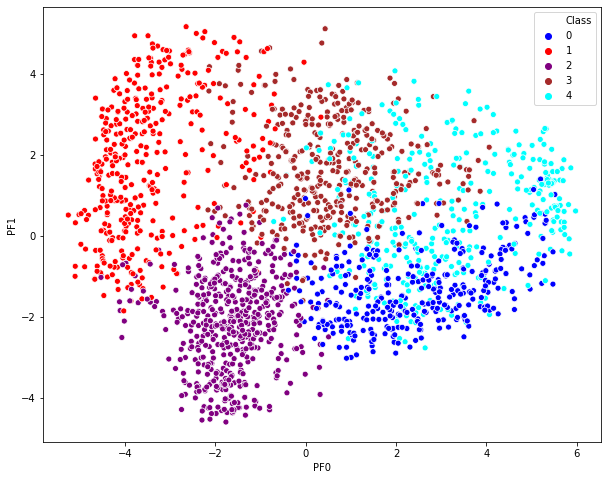

In [130]:
plt.figure(figsize=(10,8))
sns.scatterplot(pix_new["PF0"],
                pix_new["PF1"],hue=pix_new["Class"],
                palette=['blue','red','purple','brown','cyan'])
plt.show()

The above plot shows the cluster assignment for the first two principal components.

Classes 1 and 3 are well separated but the other classes are not well separated.

To evaluate our clustering algorithm, we concat all three dataframes: the orignal data and the cluster assignments and cluster.

In [47]:
column=['Class']
data_pix["Class"]=pd.DataFrame(km_clusters)
data_pix.head()

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,...,pix_231,pix_232,pix_233,pix_234,pix_235,pix_236,pix_237,pix_238,pix_239,Class
0,0,3,4,4,6,6,6,6,6,5,...,4,4,4,4,3,0,0,0,0,2
1,0,0,0,0,0,0,1,3,4,4,...,4,4,4,4,2,0,0,0,0,2
2,0,0,1,4,4,4,4,4,4,3,...,3,4,4,4,4,4,2,1,0,2
3,0,0,3,3,2,2,4,5,6,6,...,4,4,4,2,0,0,0,0,0,2
4,0,0,0,0,0,0,3,4,6,6,...,4,4,4,3,1,0,0,0,0,2


In [48]:
print(data_pix.shape)
data_pix.head()

(2000, 241)


,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,...,pix_231,pix_232,pix_233,pix_234,pix_235,pix_236,pix_237,pix_238,pix_239,Class
0,0,3,4,4,6,6,6,6,6,5,...,4,4,4,4,3,0,0,0,0,2
1,0,0,0,0,0,0,1,3,4,4,...,4,4,4,4,2,0,0,0,0,2
2,0,0,1,4,4,4,4,4,4,3,...,3,4,4,4,4,4,2,1,0,2
3,0,0,3,3,2,2,4,5,6,6,...,4,4,4,2,0,0,0,0,0,2
4,0,0,0,0,0,0,3,4,6,6,...,4,4,4,3,1,0,0,0,0,2


In [49]:
data_pix["Segment"]=data_pix["Class"].map({0:"0",
                                            1:"1",
                                            2:"2",
                                            3:"3",
                                            4:"4"})

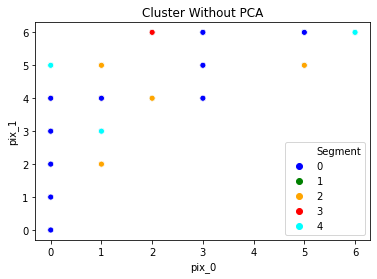

In [51]:
x=data_pix["pix_0"]
y=data_pix["pix_1"]
sns.scatterplot(x=x,y=y,hue=data_pix["Segment"],
               palette=['blue','green','orange','red','cyan'])
plt.title("Cluster Without PCA")
plt.show()

From the above, we see that PCA has helped in clustering the data. Without PCA, the points are scattered and we are not able to get any meaningful information from it.

## Zernike moments

In [52]:
data_zer=pd.read_csv('mfeat-zer', sep='\s+', header=None,names=['x'+str(i) for i in range(47)])
data_zer

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46
0,0.011033,0.831466,15.351804,75.806559,171.554214,490.156556,206.416027,0.122135,2.601646,11.472709,...,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,0.038271,1.166746,10.526913,42.369276,85.187116,420.360566,253.569574,0.033657,0.390566,11.700830,...,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,0.042698,1.225007,8.273804,31.744786,54.448177,404.103204,389.980746,0.041733,0.937399,11.629045,...,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,0.032418,1.638247,19.205283,51.196682,57.181760,429.052011,256.174645,0.073624,1.973268,13.057108,...,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,0.015866,0.611561,8.627839,37.325052,48.509025,459.909634,238.572767,0.046477,1.117292,10.012169,...,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.018696,0.060507,4.189839,20.072573,136.863862,364.365568,83.535937,0.027723,0.175661,6.677457,...,2.289602,37.077931,229.878330,6.376995,144.500902,393.876660,8.672527,152.791625,43.559482,501.537544
1996,0.025601,0.373184,8.199696,36.255929,63.651474,217.184626,107.002051,0.053221,1.002008,12.029996,...,2.230959,8.122498,224.796064,7.282318,187.335473,353.453408,1.389084,161.716981,53.922259,482.428339
1997,0.024194,0.785229,9.852438,47.772260,71.338044,381.053077,76.972270,0.051574,1.860790,21.352962,...,2.592315,23.227692,122.971707,6.250161,124.337857,359.585224,4.643621,101.472040,37.013903,430.544358
1998,0.010046,0.238167,1.285469,11.191213,81.659420,414.859326,38.144435,0.034859,1.212122,16.690799,...,3.369291,69.833696,175.418772,3.563793,140.067305,486.688709,16.109266,126.684436,41.154583,571.426195


We standardize the data

In [53]:
scaled_zer =MinMaxScaler().fit_transform(data_zer)
scaled_zer


array([[0.02004739, 0.08563364, 0.20792369, ..., 0.0882714 , 0.39086143,
        0.47621825],
       [0.07499083, 0.12156396, 0.14098449, ..., 0.20072787, 0.3808486 ,
        0.43076107],
       [0.08392217, 0.12780761, 0.10972546, ..., 0.11708492, 0.35538239,
        0.49971125],
       ...,
       [0.0465959 , 0.0806787 , 0.131627  , ..., 0.46175055, 0.24623638,
        0.23772897],
       [0.01805629, 0.02205261, 0.01277122, ..., 0.57733796, 0.30600937,
        0.54692776],
       [0.05778384, 0.07978004, 0.13131427, ..., 0.73028214, 0.34208727,
        0.18862621]])

In [54]:
pca = PCA().fit(scaled_zer)


In [55]:
variance_zer=pca.explained_variance_ratio_*100
cumulative_sum=variance_zer.cumsum()

In [56]:
cum_table=pd.DataFrame({'variance(%)': variance_zer,'cumulative_sum':cumulative_sum})
cum_table.loc[:22]

,variance(%),cumulative_sum
0,27.222518,27.222518
1,17.306576,44.529094
2,9.552652,54.081746
3,7.897146,61.978892
4,7.014115,68.993007
5,5.201990,74.194997
6,3.877545,78.072542
7,3.290843,81.363386
8,3.078723,84.442109
9,2.487535,86.929644


The first eight components explain up to 80% of the total variance. So we consider the first eight principal components and use that for the zernike moments to find the appropraite number of clusters.

In [57]:
#We then take the first 8 components as our new pixel dataset
pca = PCA(n_components=8).fit(scaled_zer)
column=['PF'+str(i) for i in range(pca.n_components)]
zer_new= pd.DataFrame(pca.transform(scaled_zer),columns=column)
zer_new

,PF0,PF1,PF2,PF3,PF4,PF5,PF6,PF7
0,-1.100714,-0.228411,0.000423,0.700701,0.135380,-0.358774,-0.045062,0.198487
1,-0.763440,-0.378908,-0.109537,0.310049,0.111852,-0.213813,0.163779,0.456441
2,-1.175036,-0.197157,-0.071398,0.178551,0.350964,-0.435505,0.241912,0.640683
3,-1.031045,-0.048397,-0.145260,0.188771,0.225928,-0.181521,0.138971,0.269689
4,-1.170520,-0.134161,-0.185306,0.159157,0.108904,-0.287188,0.065436,0.377497
...,...,...,...,...,...,...,...,...
1995,-0.421124,-0.591288,-0.050609,0.105696,-0.639905,-0.186599,0.449636,-0.106228
1996,-0.173196,-0.317668,-0.544885,-0.012302,-0.589515,0.038717,0.426159,0.080132
1997,-0.244374,-0.527463,-0.194940,0.084074,-0.297616,-0.094545,-0.358861,-0.026981
1998,-0.257786,-1.083317,0.177716,0.059668,-0.158490,0.024645,0.300459,-0.028661


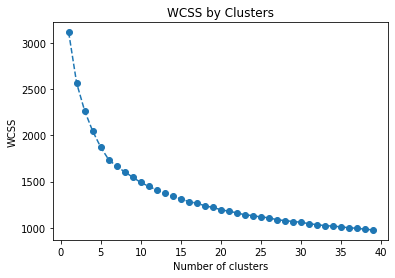

In [58]:
wcss = []
for i in range(1, 40):
    kmeans_zer = KMeans(n_clusters = i, init='k-means++',random_state=1)
    # Fit the data points
    kmeans_zer.fit(scaled_zer)
    # Get the WCSS (inertia) value
    wcss.append(kmeans_zer.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 40), wcss,marker='o',linestyle='--')
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We create a model with 5 clusters

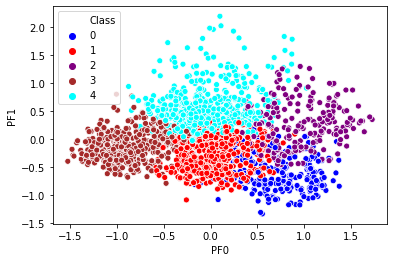

In [60]:
# Create a model based on 5 centroids
model = KMeans(n_clusters=5, init='k-means++', n_init=100, max_iter=1000,random_state=1)
km_clusters = model.fit_predict(zer_new)
# View the cluster assignments
km_clusters


zer_new['Class']=km_clusters 
sns.scatterplot(zer_new["PF0"],
                zer_new["PF1"],hue=zer_new["Class"],
                palette=['blue','red','purple','brown','cyan'])
plt.show()

The clusters generated by this dataset are highly distinguishable. The within inertia seems to be minimized while the between inertia maximized.

## Correlation Profile

In [61]:
data_fac=pd.read_csv('mfeat-fac', sep='\s+', header=None,names=['x'+str(i) for i in range(216)])
data_fac

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215
0,98,236,531,673,607,647,2,9,3,6,...,474,536,628,632,18,36,8,15,12,13
1,121,193,607,611,585,665,7,9,2,4,...,520,458,570,634,15,32,11,13,15,11
2,115,141,590,605,557,627,12,6,3,3,...,535,498,572,656,20,35,16,14,13,6
3,90,122,627,692,607,642,0,6,4,5,...,576,549,628,621,16,35,7,12,15,9
4,157,167,681,666,587,666,8,6,1,4,...,594,525,568,653,16,35,10,15,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,304,242,927,626,564,674,25,17,0,7,...,912,507,577,757,15,24,11,14,10,18
1996,324,330,919,713,609,693,28,16,8,9,...,898,554,620,632,12,25,11,10,12,17
1997,337,299,852,724,581,660,22,14,10,10,...,841,579,590,681,18,27,13,15,17,21
1998,247,261,866,633,565,615,24,15,2,4,...,839,498,556,706,16,26,13,13,15,15


In [62]:
fac_scaled=MinMaxScaler().fit_transform(data_fac)
fac_scaled

array([[0.06919643, 0.32024793, 0.04057592, ..., 0.78571429, 0.5       ,
        0.56521739],
       [0.12053571, 0.23140496, 0.14005236, ..., 0.64285714, 0.71428571,
        0.47826087],
       [0.10714286, 0.12396694, 0.11780105, ..., 0.71428571, 0.57142857,
        0.26086957],
       ...,
       [0.60267857, 0.45041322, 0.46073298, ..., 0.78571429, 0.85714286,
        0.91304348],
       [0.40178571, 0.37190083, 0.47905759, ..., 0.64285714, 0.71428571,
        0.65217391],
       [0.64285714, 0.61570248, 0.48036649, ..., 0.57142857, 0.5       ,
        0.86956522]])

In [63]:
#And perform PCA on the data
pca = PCA().fit(fac_scaled)
#We calculate the variance explained by the components.
variance_fac=pca.explained_variance_ratio_*100
cumulative_sum_fac=variance_fac.cumsum()
cum_table=pd.DataFrame({'variance(%)': variance_fac,'cumulative_sum':cumulative_sum_fac})
cum_table.loc[:22]

,variance(%),cumulative_sum
0,25.266222,25.266222
1,15.773462,41.039685
2,11.766827,52.806511
3,7.093681,59.900192
4,6.241325,66.141517
5,5.096347,71.237864
6,3.425499,74.663363
7,3.063989,77.727352
8,2.418108,80.145460
9,1.760799,81.906258


We consider the first 9 principal components as it contains about 80% of the information

In [64]:
#We then take the first 9 components as our new pixel dataset
pca = PCA(n_components=9).fit(fac_scaled)
column=['PF'+str(i) for i in range(pca.n_components)]
fac_new= pd.DataFrame(pca.transform(fac_scaled),columns=column)
fac_new

,PF0,PF1,PF2,PF3,PF4,PF5,PF6,PF7,PF8
0,-1.547227,-1.674892,-0.849877,-0.719966,0.179177,-0.482198,0.207952,-0.045883,-0.180106
1,-1.002538,-1.826401,-0.479417,-0.726060,0.381319,-0.682561,0.053207,0.216590,-0.115415
2,-1.533917,-1.709919,-0.316832,-0.401149,0.395766,-0.713001,0.624997,0.005251,0.178858
3,-1.278989,-1.604492,-0.618315,-0.485314,0.443360,-0.514143,0.332908,0.286567,-0.013916
4,-1.342449,-1.416238,-0.559022,-0.699730,0.162563,-0.907967,-0.113550,0.089384,0.286021
...,...,...,...,...,...,...,...,...,...
1995,0.931823,-1.301690,1.027593,0.616777,-0.470879,-0.216036,-0.191196,-0.656679,0.698181
1996,1.896302,-1.091651,0.050227,0.167675,-0.396973,-0.347122,0.415796,0.134395,0.517745
1997,0.863376,-1.106833,0.462223,1.180429,0.161422,-0.235438,-1.162148,-0.142229,0.276235
1998,0.550474,-1.587914,1.180459,0.735217,0.198950,-0.048695,-0.280403,-0.344776,0.147503


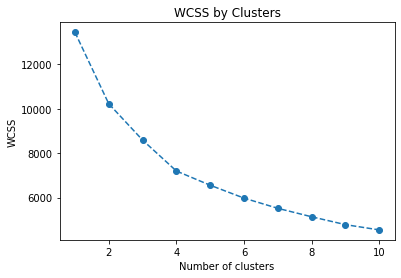

In [65]:
wcss = []
for i in range(1, 11):
    kmeans_fac = KMeans(n_clusters = i, init='k-means++',random_state=1)
    # Fit the data points
    kmeans_fac.fit(fac_new)
    # Get the WCSS (inertia) value
    wcss.append(kmeans_fac.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss,marker='o',linestyle='--')
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We consider 4 clusters here as depicted by the graph

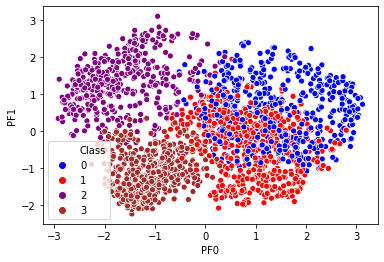

In [67]:
# Create a model based on 4 centroids
model = KMeans(n_clusters=4, init='k-means++', n_init=100, max_iter=1000,random_state=1)
km_clusters = model.fit_predict(fac_new)
# View the cluster assignments
km_clusters


fac_new['Class']=km_clusters 
sns.scatterplot(fac_new["PF0"],
                fac_new["PF1"],hue=fac_new["Class"],
                palette=['blue','red','purple','brown'])
plt.show()

The clusters are not well separated.

## All the Dataset

In [68]:
data=pd.read_csv('data.csv')
data.drop("Unnamed: 0", axis = 1, inplace = True)


In [69]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V38.4,V39.4,V40.4,V41.4,V42.4,V43.4,V44.4,V45.4,V46.4,V47.4
0,0,3,4,4,6,6,6,6,6,5,...,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,0,0,0,0,0,0,1,3,4,4,...,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,0,0,1,4,4,4,4,4,4,3,...,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,0,0,3,3,2,2,4,5,6,6,...,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,0,0,0,0,0,0,3,4,6,6,...,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513


The info provided by the website states that there are 10 clusters with each set of 200 individuals belonging to a cluster. We try to see if we get up to 10 clusters like the website provided using different clustering algorithms.

We use three different clustering algorithms: KMeans, Agglomerative and Hierachial Clustering and try to see which of the algorithms are able to separate the 10 classes appropraitely.

In [113]:
data_scaled = (data-data.mean(axis=0))/data.std()

pca = PCA().fit(data_scaled)

In [114]:
variance=pca.explained_variance_ratio_*100
cumulative_sum=variance.cumsum()
cum_table=pd.DataFrame({'variance(%)': variance,'cumulative_sum':cumulative_sum})
cum_table.loc[:30]

,variance(%),cumulative_sum
0,14.797083,14.797083
1,10.030673,24.827755
2,8.494313,33.322068
3,5.601399,38.923467
4,4.854569,43.778037
5,3.870043,47.648080
6,3.351589,50.999669
7,2.704550,53.704219
8,2.373034,56.077253
9,2.212483,58.289735


We get 80% variance from about 27 principal components

In [115]:
column=['PF'+str(i) for i in range(649)]
data_new= pd.DataFrame(pca.transform(data_scaled),columns=column)
data_new

,PF0,PF1,PF2,PF3,PF4,PF5,PF6,PF7,PF8,PF9,...,PF639,PF640,PF641,PF642,PF643,PF644,PF645,PF646,PF647,PF648
0,-10.789888,-14.213675,-2.735156,-2.498188,-1.183176,7.073886,-2.578135,2.312277,-1.390882,1.416821,...,-0.019103,0.016861,0.000485,-0.001482,0.000696,0.000341,-0.000080,6.069923e-16,8.309559e-16,1.643318e-16
1,-8.028699,-13.080956,1.290162,-5.412125,-5.432770,7.034120,0.875677,2.191745,-3.159583,1.650779,...,0.007326,-0.004841,0.001854,-0.001385,0.001030,-0.001042,0.000695,-4.073482e-16,4.025282e-16,-4.701242e-16
2,-11.853768,-12.371927,0.499792,-0.850676,-4.470024,3.152704,-6.133828,6.614749,-4.271631,-1.365931,...,-0.006935,-0.000517,-0.000576,-0.000185,0.000598,-0.000759,0.000145,4.797554e-16,3.211222e-16,-2.867571e-16
3,-8.375311,-13.198684,-1.619159,-2.735668,-2.865611,2.760415,-1.289946,6.482925,-3.559026,0.848946,...,-0.001956,0.000113,-0.000670,0.001449,-0.000142,0.000515,0.000890,1.116869e-16,5.842880e-17,-4.728022e-16
4,-11.084249,-10.571456,-0.975875,-6.273341,-2.338491,7.775180,1.280816,2.371517,-2.397270,-3.129159,...,-0.001550,-0.000646,0.000587,-0.000127,-0.002407,-0.000154,0.000072,6.378511e-16,2.886164e-16,2.786776e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.769067,-8.678745,10.233094,2.824471,0.664905,-1.597381,-4.232240,-4.575432,2.838324,-9.602686,...,0.002773,-0.001547,-0.000737,0.001485,-0.001340,0.000705,-0.000188,9.598930e-16,-7.529042e-16,2.527241e-16
1996,9.284799,-8.809589,5.356709,0.754257,1.015119,2.737279,2.329659,0.712065,-4.390020,-4.844033,...,-0.008374,0.001924,0.001121,0.000119,-0.000917,-0.000229,0.000210,-2.439278e-16,7.783940e-16,-2.646780e-16
1997,3.091136,-7.747077,7.407770,7.714628,-4.052805,2.220192,2.001649,-8.091696,-0.343375,-5.731121,...,-0.003027,0.001897,-0.001012,0.002389,0.000777,0.000106,0.000114,9.229499e-16,-1.438255e-16,-1.317306e-15
1998,0.014778,-8.773272,12.096583,1.365109,-4.050355,-1.909037,0.013554,-6.129999,-1.581119,-3.619974,...,-0.000466,-0.001143,0.010502,0.000040,-0.000824,-0.000120,0.000612,-8.468779e-16,-2.306372e-16,-9.482458e-16


In [116]:
pca = PCA(n_components=4).fit(data_scaled)
column=['PF'+str(i) for i in range(pca.n_components)]
total_data= pd.DataFrame(pca.transform(data_scaled),columns=column)
total_data

,PF0,PF1,PF2,PF3
0,-10.789888,-14.213675,-2.735156,-2.498191
1,-8.028699,-13.080956,1.290162,-5.412124
2,-11.853768,-12.371927,0.499792,-0.850677
3,-8.375311,-13.198684,-1.619159,-2.735680
4,-11.084249,-10.571456,-0.975876,-6.273314
...,...,...,...,...
1995,1.769067,-8.678745,10.233094,2.824468
1996,9.284799,-8.809589,5.356709,0.754258
1997,3.091136,-7.747077,7.407770,7.714615
1998,0.014778,-8.773272,12.096583,1.365099


We obtain the optimal number of clusters by the elbow method from kmeans library.

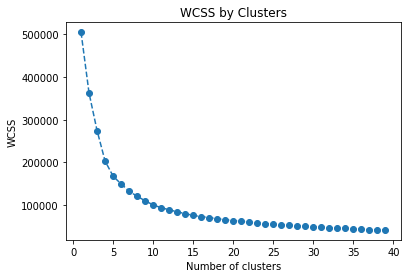

In [117]:
wcss = []
for i in range(1, 40):
    kmeans_total = KMeans(n_clusters = i, init='k-means++',random_state=1)
    # Fit the data points
    kmeans_total.fit(total_data.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans_total.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 40), wcss,marker='o',linestyle='--')
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

This algorithm suggests that 5 clusters is optimal. Hence, we use kmeans and initialize 5 clusters.

In [118]:
# Create a model based on 5 centroids
model = KMeans(n_clusters=5, init='k-means++', n_init=100, max_iter=1000,random_state=1)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(total_data.values)
# View the cluster assignments
km_clusters

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [119]:
total_data['Class']=km_clusters

<AxesSubplot:xlabel='PF0', ylabel='PF1'>

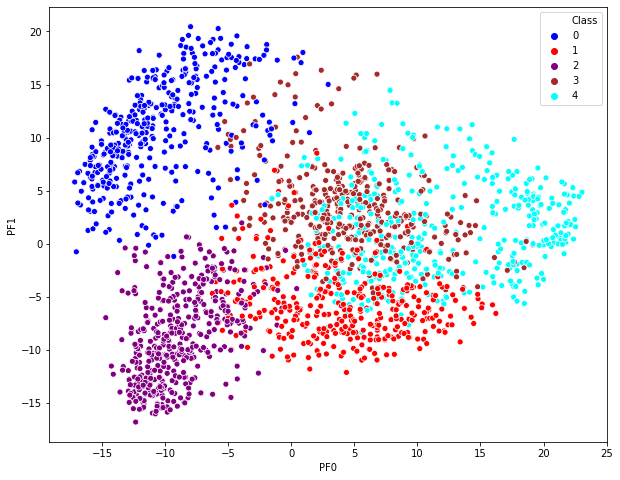

In [131]:
plt.figure(figsize=(10,8))
sns.scatterplot(total_data["PF0"],
                total_data["PF1"],hue=total_data["Class"],
                palette=['blue','red','purple','brown','cyan'])

<AxesSubplot:xlabel='PF1', ylabel='PF2'>

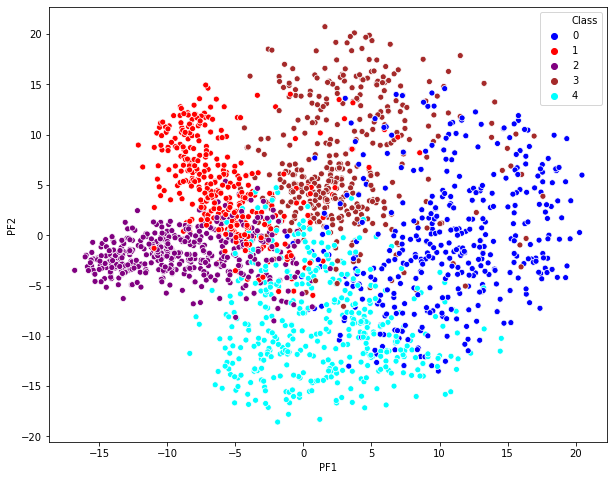

In [132]:
plt.figure(figsize=(10,8))
sns.scatterplot(total_data["PF1"],
                total_data["PF2"],hue=total_data["Class"],
                palette=['blue','red','purple','brown','cyan'])

<AxesSubplot:xlabel='PF3', ylabel='PF1'>

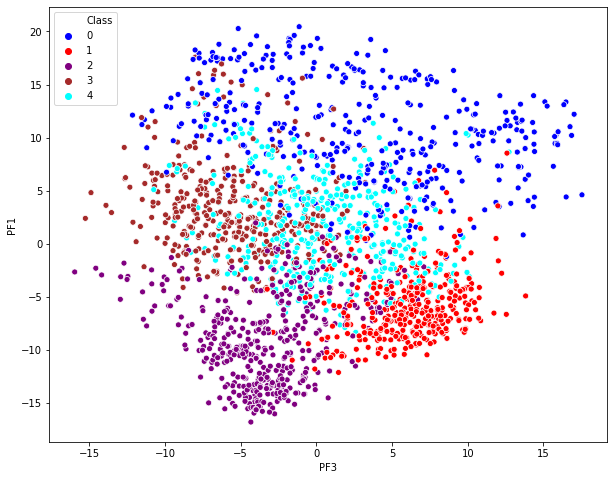

In [133]:
plt.figure(figsize=(10,8))
sns.scatterplot(total_data["PF3"],
                total_data["PF1"],hue=total_data["Class"],
                palette=['blue','red','purple','brown','cyan'])

The KMeans cluster does quite well, but can we cluster better? So we try another clustering method and compare the results.

## Agglomerative Clustering and Dendograms

Here, we use the dendograms and get the number of clusters then use the number of clustering obtained in the agglomerative clustering algorithm.

In [123]:
import scipy.cluster.hierarchy as shc

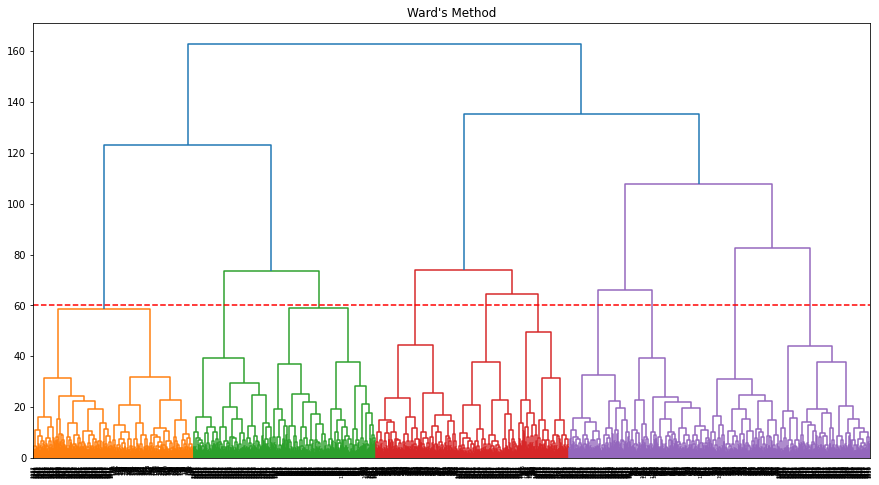

In [81]:
plt.figure(figsize=(15, 8))  
plt.title("Ward's Method")  
dend = shc.dendrogram(shc.linkage(total_data, method='ward'))
plt.axhline(y=60, color='r', linestyle='--')

When we make a cut at 60, we have 11 clusters. We then apply this to the agglomerative algorithm.

In [124]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward')  
agg_clusters=cluster.fit_predict(total_data)

In [125]:
total_data['Class_agg']=agg_clusters

<AxesSubplot:xlabel='PF0', ylabel='PF1'>

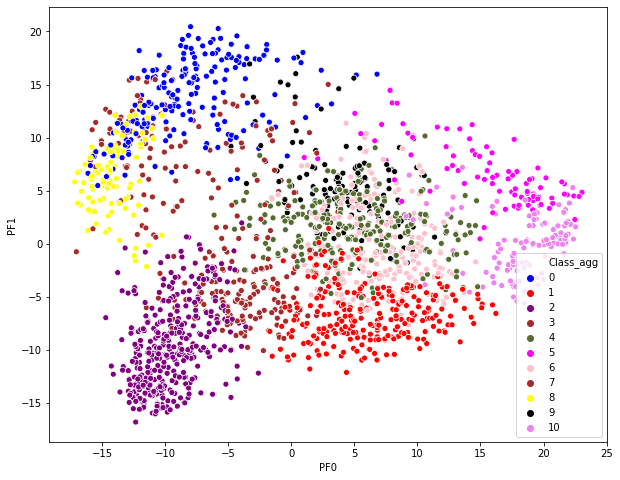

In [135]:
plt.figure(figsize=(10,8))
sns.scatterplot(total_data["PF0"],
                total_data["PF1"],hue=total_data['Class_agg'],
                palette=['blue','red','purple','brown',
                         'darkolivegreen','magenta','pink','brown','yellow','black','violet'])#'indigo',
#                         'gray','darkkhaki','lime'])

This clustering algorithm seems to be similar to KMeans. Classes 0,5,6 and 4 are well separated.

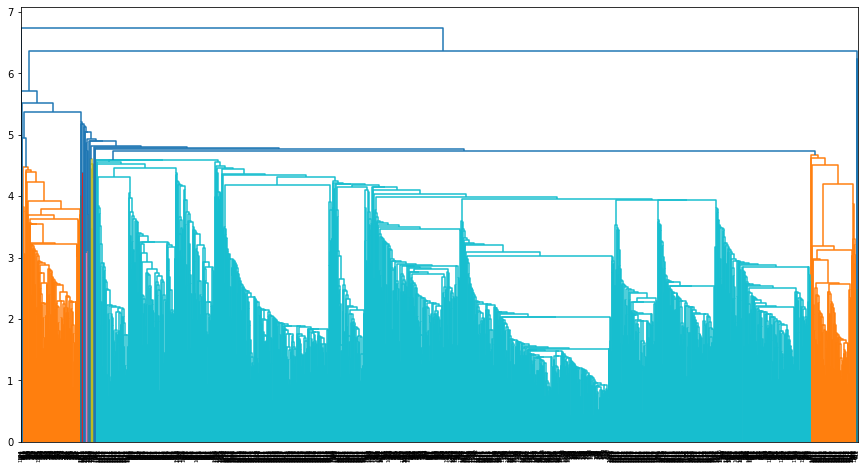

In [128]:
plt.figure(figsize=(15, 8))  

dend = shc.dendrogram(shc.linkage(total_data, method='single'))

Single linkage does not give good unformation as the data set is very huge. 

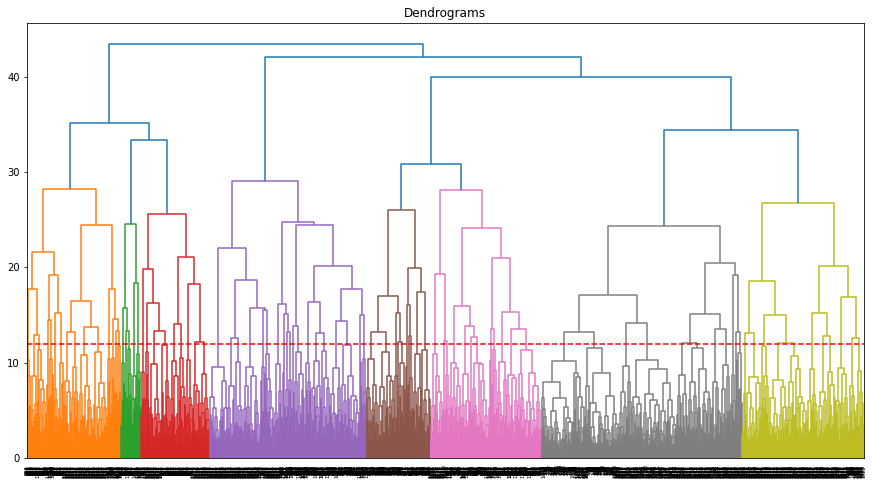

In [137]:
plt.figure(figsize=(15, 8))  
plt.title("Dendrograms") 
dend = shc.dendrogram(shc.linkage(total_data, method='complete'))
plt.axhline(y=12, color='r', linestyle='--')

In [138]:
cluster = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='complete')  
agg_clusters_complete=cluster.fit_predict(total_data)

In [139]:
total_data['Class_complete']=agg_clusters_complete

<AxesSubplot:xlabel='PF0', ylabel='PF2'>

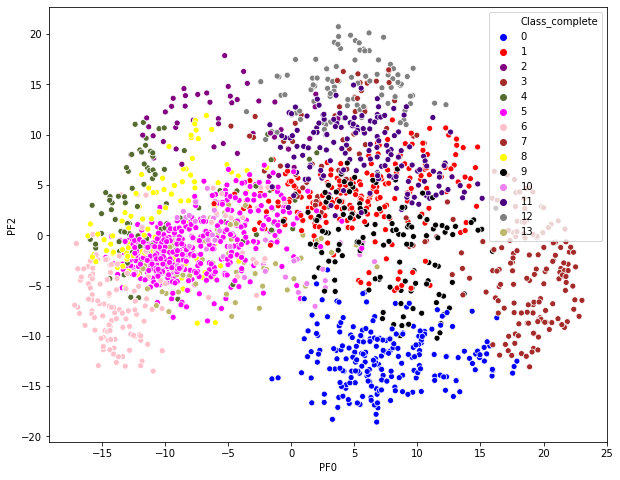

In [140]:
plt.figure(figsize=(10,8))
x=total_data["PF0"]
y=total_data["PF2"]
sns.scatterplot(x,y,hue=total_data['Class_complete'],
                palette=['blue','red','purple','brown',
                         'darkolivegreen','magenta','pink','brown','yellow','black','violet','indigo',
                        'gray','darkkhaki'])

Complete linkage was able to separate classes 5,10,2 and 9 very well.

## Conclusion

After exploring the data, the following are the results obtained:

    1. It is necessary to carry out PCA first before any attempt at clustering
    
    2. The optimal clustering for each dataset differs.
    
    3. After concating all the dataset, the wards method was able to give a reasonable amount of between inertia